In [2]:
import pandas as pd

train = pd.read_csv("train_FD001.txt", sep=' ', header=None)
print(train)
train = train.iloc[:, :24]  # remove empty 26 & 27 (NaN)

# according to read.me we have a near-failure if cycle is close to max per engine
train['RUL'] = train.groupby(0)[1].transform("max") - train[1] # we calculate Remaining Useful Life per engine (RUL)
train['target'] = (train['RUL'] <= 30).astype(int) # we create a bin target (we're nearing failure if RUL <= 30)
train 

        0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22     23     24       25  \
0      14

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,RUL,target
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,4,1
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,3,1
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,2,1
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,1,1


In [3]:
sus = [i for i in range(24)] 
for i in sus : 
    print("train[",i,"].unique()  = ",train[i].unique())
    print(train[i].dtype)

train[ 0 ].unique()  =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
int64
train[ 1 ].unique()  =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133

- col 0 des ID (we have 100 donc ok)
- col 1 cycle numb donc ok
- cols 2-21 lectures et float donc ok
- cols 4, 9, 20,22, 23 constantes donc pas ok 

In [4]:
features = [2,3,5,6,7,8,10,11,12,13,15,16,17,18,19,21]  # skipping columns with only 1 value
X = train[features]
y = train['target']
X,y


(            2       3       5       6        7        8     10      11  \
 0     -0.0007 -0.0004  518.67  641.82  1589.70  1400.60  21.61  554.36   
 1      0.0019 -0.0003  518.67  642.15  1591.82  1403.14  21.61  553.75   
 2     -0.0043  0.0003  518.67  642.35  1587.99  1404.20  21.61  554.26   
 3      0.0007  0.0000  518.67  642.35  1582.79  1401.87  21.61  554.45   
 4     -0.0019 -0.0002  518.67  642.37  1582.85  1406.22  21.61  554.00   
 ...       ...     ...     ...     ...      ...      ...    ...     ...   
 20626 -0.0004 -0.0003  518.67  643.49  1597.98  1428.63  21.61  551.43   
 20627 -0.0016 -0.0005  518.67  643.54  1604.50  1433.58  21.61  550.86   
 20628  0.0004  0.0000  518.67  643.42  1602.46  1428.18  21.61  550.94   
 20629 -0.0011  0.0003  518.67  643.23  1605.26  1426.53  21.61  550.68   
 20630 -0.0032 -0.0005  518.67  643.85  1600.38  1432.14  21.61  550.79   
 
             12       13     15      16       17       18      19   21  
 0      2388.06  9046.19 

on a des -0.0004 et des 9065, trop cool :) 

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled
#


array([[-0.31597968, -1.3729532 ,  0.        , ..., -0.26907104,
        -0.6038157 , -0.78170979],
       [ 0.87272193, -1.03172035,  0.        , ..., -0.64284474,
        -0.27585181, -0.78170979],
       [-1.96187421,  1.01567674,  0.        , ..., -0.55162928,
        -0.64914404, -2.07309423],
       ...,
       [ 0.18693254, -0.00802181,  0.        , ..., -0.14168393,
         3.26509164,  3.09244354],
       [-0.49885685,  1.01567674,  0.        , ..., -0.23394785,
         2.57983376,  1.15536688],
       [-1.458962  , -1.71418605,  0.        , ..., -0.3366963 ,
         1.63860406,  1.8010591 ]])

In [27]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.corr()


,2,3,5,6,7,8,10,11,12,13,15,16,17,18,19,21
2,1.000000,0.011660,NaN,0.009030,-0.005651,0.009544,-0.001340,-0.009437,-0.000427,-0.004279,0.011658,-0.001491,0.002318,-0.004469,0.007652,0.002599
3,0.011660,1.000000,NaN,0.007266,0.009068,0.014673,0.014355,-0.016678,0.013285,-0.005425,0.011690,-0.010923,0.018156,-0.006310,0.014156,0.012280
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.009030,0.007266,NaN,1.000000,0.602610,0.714949,0.132242,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886
7,-0.005651,0.009068,NaN,0.602610,1.000000,0.678413,0.116039,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017
8,0.009544,0.014673,NaN,0.714949,0.678413,1.000000,0.150480,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499
10,-0.001340,0.014355,NaN,0.132242,0.116039,0.150480,1.000000,-0.155720,0.152161,0.019347,0.160014,-0.155884,0.158276,-0.002112,0.149042,0.130810
11,-0.009437,-0.016678,NaN,-0.702136,-0.664595,-0.793130,-0.155720,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893
12,-0.000427,0.013285,NaN,0.662325,0.602481,0.746852,0.152161,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785
13,-0.004279,-0.005425,NaN,0.273764,0.322964,0.297429,0.019347,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110


col 5 et ligne 5 donne que des NaN

In [31]:
X_scaled_df = X_scaled_df.drop(columns=[5])
X_scaled_df = X_scaled_df.drop(X_scaled_df.index[5])


In [34]:
X = X_scaled_df
corr_matrix = X.corr()
corr_matrix

,2,3,6,7,8,10,11,12,13,15,16,17,18,19,21
2,1.000000,0.011628,0.008921,-0.005746,0.009434,-0.001327,-0.009299,-0.000529,-0.004346,0.011524,-0.001457,0.002231,-0.004524,0.007573,0.002464
3,0.011628,1.000000,0.007247,0.009051,0.014654,0.014357,-0.016654,0.013267,-0.005437,0.011667,-0.010916,0.018141,-0.006320,0.014142,0.012256
6,0.008921,0.007247,1.000000,0.602588,0.714930,0.132255,-0.702113,0.662305,0.273737,0.740000,-0.724584,0.661776,0.179727,0.675962,0.629857
7,-0.005746,0.009051,0.602588,1.000000,0.678395,0.116049,-0.664575,0.602460,0.322942,0.695883,-0.680308,0.600946,0.237117,0.639907,0.599993
8,0.009434,0.014654,0.714930,0.678395,1.000000,0.150493,-0.793114,0.746836,0.297402,0.830123,-0.815600,0.745146,0.190723,0.758449,0.703476
10,-0.001327,0.014357,0.132255,0.116049,0.150493,1.000000,-0.155739,0.152172,0.019352,0.160032,-0.155887,0.158286,-0.002108,0.149050,0.130826
11,-0.009299,-0.016654,-0.702113,-0.664575,-0.793114,-0.155739,1.000000,-0.767117,-0.217799,-0.822787,0.812732,-0.764601,-0.110019,-0.747043,-0.692861
12,-0.000529,0.013267,0.662305,0.602460,0.746836,0.152172,-0.767117,1.000000,-0.032129,0.782199,-0.786545,0.826076,-0.144822,0.700937,0.627759
13,-0.004346,-0.005437,0.273737,0.322942,0.297402,0.019352,-0.217799,-0.032129,1.000000,0.274559,-0.210229,-0.034795,0.963156,0.293733,0.337082
15,0.011524,0.011667,0.740000,0.695883,0.830123,0.160032,-0.822787,0.782199,0.274559,1.000000,-0.846903,0.780752,0.163378,0.780907,0.722269


In [40]:
y = y.drop(5)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[3467   66]
 [  96  497]]
Accuracy: 0.9607367910809501


On a 96 faux négatif, et c'est too much :) 

In [46]:
# T for true N for negative P for positive and F for fals 
TN, FP = 3467, 66
FN, TP = 96, 497

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Precision: 0.883
Recall: 0.838
F1-score: 0.860


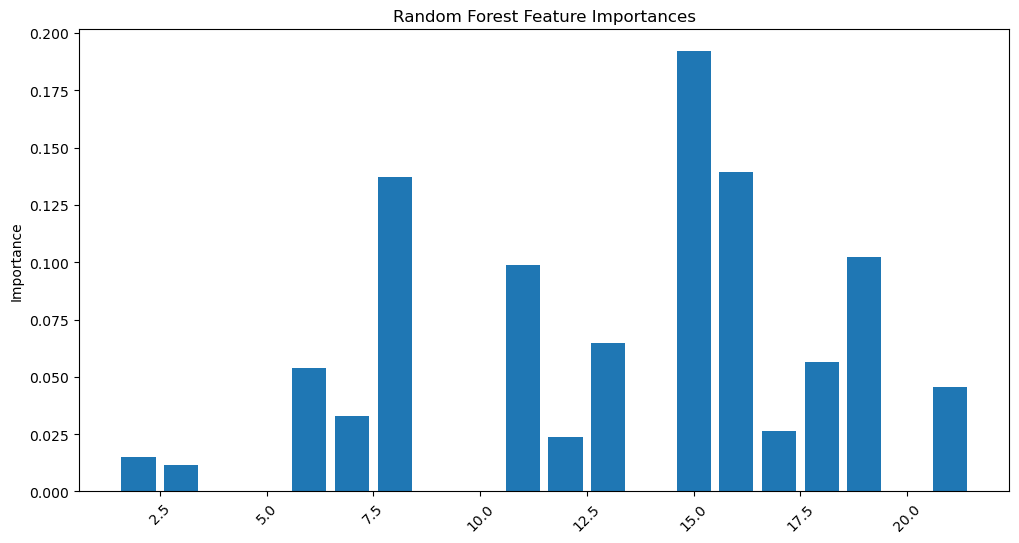

In [47]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#unpeu + avec les RF
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


importances = rf.feature_importances_
features = X.columns

# show tiiiime 
plt.figure(figsize=(12,6))
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()


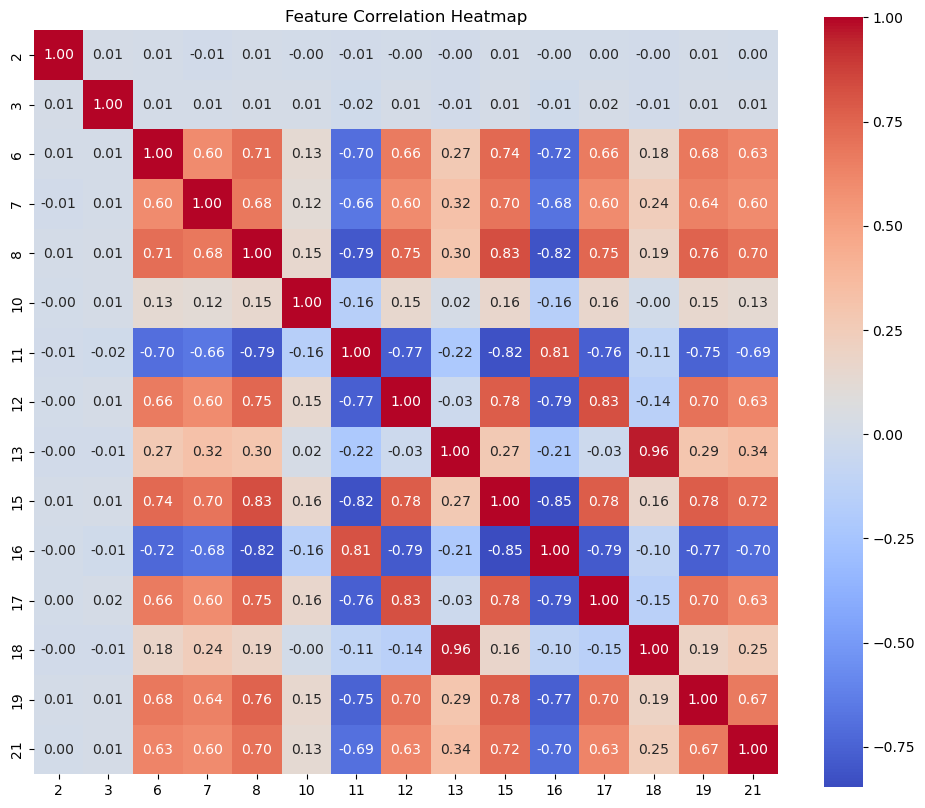

In [ ]:
import seaborn as sns
#not-relavent 
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


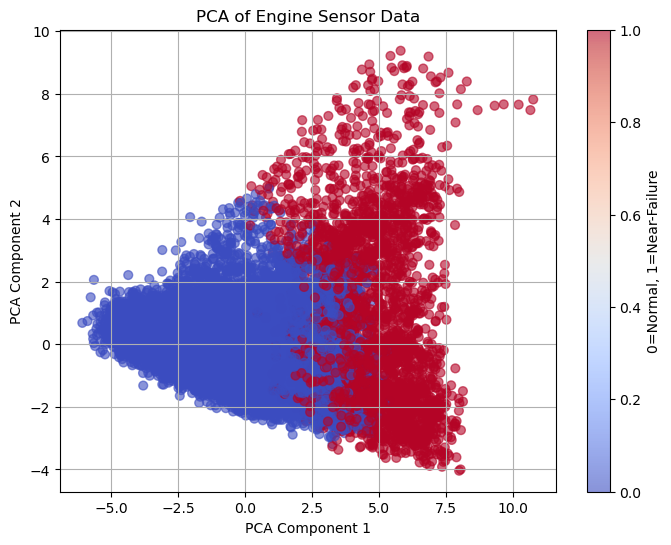

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=y,                 
    cmap='coolwarm',     # blue=0, red=1
    alpha=0.6,           # transparence
    s=40                 
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Engine Sensor Data')
plt.colorbar(scatter, label='0=Normal, 1=Near-Failure')
plt.grid(True)
plt.show()
